In [48]:
import pandas as pd
import pyarrow.parquet as pp
from frust.utils.analytics import summarize_ts_vibrations
import frust.vis as vis
vis.darkmode = False

In [49]:
schema = pp.read_schema("output_files/07_ts1_UMA_2.parquet")
L = schema.names
L

['custom_name',
 'ligand_name',
 'rpos',
 'constraint_atoms',
 'cid',
 'smiles',
 'atoms',
 'coords_embedded',
 'energy_uff',
 'xtb-gfnff-opt-electronic_energy',
 'xtb-gfnff-opt-normal_termination',
 'xtb-gfnff-opt-opt_coords',
 'xtb-gfn-opt-electronic_energy',
 'xtb-gfn-opt-normal_termination',
 'xtb-gfn-opt-opt_coords',
 'orca-ExtOpt-OptTS-electronic_energy',
 'orca-ExtOpt-OptTS-gibbs_energy',
 'orca-ExtOpt-OptTS-normal_termination',
 'orca-ExtOpt-OptTS-opt_coords',
 'orca-ExtOpt-OptTS-vibs']

In [50]:
L.remove("orca-ExtOpt-OptTS-vibs")

In [51]:
df_ts1 = pd.read_parquet("output_files/07_ts1_UMA_2.parquet")

df_ts1_1methyl =  df_ts1[df_ts1["ligand_name"] == "1-methylpyrrole"].dropna(subset=["orca-ExtOpt-OptTS-vibs"]).sort_values(by=["orca-ExtOpt-OptTS-normal_termination"])

In [52]:
vis.plot_mols(df_ts1.head(2), coord_indices=slice(-2, None))

Found 2 coordinate columns: ['xtb-gfn-opt-opt_coords', 'orca-ExtOpt-OptTS-opt_coords']
Processing 2 rows
Generated 4 molecules for display


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [53]:
vis.plot_row(df_ts1, 3)

Found 4 coordinate columns: ['coords_embedded', 'xtb-gfnff-opt-opt_coords', 'xtb-gfn-opt-opt_coords', 'orca-ExtOpt-OptTS-opt_coords']
Processing 1 rows
Generated 4 molecules for display


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [54]:
# orca-ExtOpt-NumFreq-vibs
# orca-ExtOpt-OptTS-opt_coords

In [55]:
# vis.plot_vibs(df, row_index=22, custom_coords_col_name="orca-ExtOpt-OptTS-opt_coords")
vis.plot_vibs(df_ts1, row_index=15, amplitude=0.5, transparent=True)

Normal mode 0 with frequency -1124.49 cm^-1


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [56]:
df_mols = pd.read_parquet("output_files/08_UMA_mols.parquet")

In [57]:
vis.plot_lig(df_mols, ["dimer"])

Found 3 coordinate columns: ['coords_embedded', 'xtb-gfnff-opt-opt_coords', 'orca-ExtOpt-Opt-opt_coords']
Processing 1 rows
Generated 3 molecules for display


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [58]:
df_mols

custom_name      ligand_name  rpos  \
246         CN1C=CC=C1_1-methylpyrrole  1-methylpyrrole   NaN   
871   CN1C=CC=C1_HBpin-ligand_rpos(24)     HBpin-ligand  24.0   
911   CN1C=CC=C1_HBpin-ligand_rpos(25)     HBpin-ligand  25.0   
1031              CN1C=CC=C1_HBpin-mol        HBpin-mol   NaN   
107                      CN1C=CC=C1_HH               HH   NaN   
361                CN1C=CC=C1_catalyst         catalyst   NaN   
53                    CN1C=CC=C1_dimer            dimer   NaN   
403           CN1C=CC=C1_int2_rpos(19)             int2  19.0   
565           CN1C=CC=C1_int2_rpos(20)             int2  20.0   
603           CN1C=CC=C1_mol2_rpos(19)             mol2  19.0   
765           CN1C=CC=C1_mol2_rpos(20)             mol2  20.0   

     constraint_atoms  cid smiles  \
246              None   46   None   
871              None   71   None   
911              None   11   None   
1031             None   31   None   
107              None    7   None   
361              None   61   None   
53               None   53   None   
403              None    3   None   
565              None   65   None   
603              None    3   None   
765              None   65   None   

                                                  atoms  \
246             [C, N, C, C, C, C, H, H, H, H, H, H, H]   
871   [C, C, C, O, B, O, C, C, C, C, N, C, C, C, C, ...   
911   [C, C, C, O, B, O, C, C, C, C, N, C, C, C, C, ...   
1031  [C, C, C, O, B, O, C, C, C, H, H, H, H, H, H, ...   
107                                              [H, H]   
361   [C, C, C, C, C, C, C, C, C, N, C, C, C, C, C, ...   
53    [C, C, C, C, C, C, C, C, C, N, C, C, C, C, C, ...   
403   [C, C, C, C, C, C, C, C, C, N, C, C, C, C, C, ...   
565   [C, C, C, C, C, C, C, C, C, N, C, C, C, C, C, ...   
603   [C, C, C, C, C, C, C, C, C, N, C, C, C, C, C, ...   
765   [C, C, C, C, C, C, C, C, C, N, C, C, C, C, C, ...   

                                        coords_embedded energy_uff  \
246   [[-1.8959232360716167, -0.013364022966458394, ...       None   
871   [[-1.9891119010076668, -0.7343586559019668, 1....       None   
911   [[-2.7878569915525553, -0.30948322590002225, 1...       None   
1031  [[1.3384740956669894, -1.3761798246744965, 0.2...       None   
107   [[0.3495069281258684, 0.0, 0.0], [-0.349506928...       None   
361   [[-0.03539561520321537, -2.4049550650837848, -...       None   
53    [[-3.2486305782431026, -2.02494980220667, -0.9...       None   
403   [[1.2197609665102165, -0.48983308743362985, 0....       None   
565   [[0.928203824807616, 0.45916250977512396, 0.65...       None   
603   [[1.2197609665102165, -0.48983308743362985, 0....       None   
765   [[0.928203824807616, 0.45916250977512396, 0.65...       None   

      xtb-gfnff-opt-electronic_energy  xtb-gfnff-opt-normal_termination  \
246                         -2.418192                              True   
871                         -5.490649                              True   
911                         -5.488969                              True   
1031                        -3.253584                              True   
107                         -0.163854                              True   
361                         -6.733170                              True   
53                         -13.350627                              True   
403                         -9.022964                              True   
565                         -9.010525                              True   
603                         -9.022964                              True   
765                         -9.010525                              True   

                               xtb-gfnff-opt-opt_coords  \
246   [[-1.90185945683498, -0.0115299296313, -0.0386...   
871   [[-2.30047262012312, -0.7132716210578, 1.60744...   
911   [[-2.62683766717383, -0.37431816949709, 1.8153...   
1031  [[1.35807630379612, -1.28421272429025, 0.56338...   
107   [[0.3892336836505, 0.0, 0.0], [-0.389233683650...

In [59]:
conversion_factor = 627.509474

d_gibbs = -1330.48658125 * conversion_factor
d_elec = -1331.160533733 * conversion_factor
HH_gibbs = -1.16222975 * conversion_factor

l_gibbs = -249.37977605 * conversion_factor
ts1_methyl_gibbs = -914.58750419 * conversion_factor
int1_gibbs = -665.23267599 * conversion_factor
int2_gibbs = -913.436269 * conversion_factor

HBpin_lig_gibbs = -659.91338555 * conversion_factor
HBpin_gibbs = -411.69083309 * conversion_factor

In [60]:
dG_ts1 = (2*(ts1_methyl_gibbs - l_gibbs) - d_gibbs) / 2
dG_ts1

22.315796256472822

In [61]:
dG_int1 = (2 * int1_gibbs - d_gibbs) / 2
dG_int1

6.660784025560133

In [62]:
dG_int2 = (2 * (int2_gibbs - l_gibbs + HH_gibbs) - d_gibbs) / 2
dG_int2

15.416605693928432

In [63]:
dG_HBpin = HBpin_lig_gibbs - (HBpin_gibbs + l_gibbs - HH_gibbs)
dG_HBpin

-3.1414128283504397

In [64]:
vis.plot_lig(df_mols, "int2")

Found 3 coordinate columns: ['coords_embedded', 'xtb-gfnff-opt-opt_coords', 'orca-ExtOpt-Opt-opt_coords']
Processing 2 rows
Generated 6 molecules for display


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [65]:
df_int2_mol2 = pd.read_parquet("output_files/21_uma_int2_mol2.parquet")
df_int2_mol2

custom_name ligand_name  rpos constraint_atoms  cid smiles  \
0   CN1C=CC=C1_int2_rpos(19)        int2    19             None  131   None   
1   CN1C=CC=C1_int2_rpos(19)        int2    19             None  110   None   
2   CN1C=CC=C1_int2_rpos(19)        int2    19             None   41   None   
3   CN1C=CC=C1_int2_rpos(19)        int2    19             None   85   None   
4   CN1C=CC=C1_int2_rpos(19)        int2    19             None  114   None   
5   CN1C=CC=C1_int2_rpos(19)        int2    19             None   44   None   
6   CN1C=CC=C1_int2_rpos(19)        int2    19             None  179   None   
7   CN1C=CC=C1_int2_rpos(19)        int2    19             None   19   None   
8   CN1C=CC=C1_int2_rpos(19)        int2    19             None  163   None   
9   CN1C=CC=C1_int2_rpos(19)        int2    19             None   88   None   
10  CN1C=CC=C1_int2_rpos(20)        int2    20             None   32   None   
11  CN1C=CC=C1_int2_rpos(20)        int2    20             None  173   None   
12  CN1C=CC=C1_int2_rpos(20)        int2    20             None   79   None   
13  CN1C=CC=C1_int2_rpos(20)        int2    20             None  163   None   
14  CN1C=CC=C1_int2_rpos(20)        int2    20             None  154   None   
15  CN1C=CC=C1_int2_rpos(20)        int2    20             None  110   None   
16  CN1C=CC=C1_int2_rpos(20)        int2    20             None  193   None   
17  CN1C=CC=C1_int2_rpos(20)        int2    20             None    8   None   
18  CN1C=CC=C1_int2_rpos(20)        int2    20             None  123   None   
19  CN1C=CC=C1_int2_rpos(20)        int2    20             None   39   None   
20  CN1C=CC=C1_mol2_rpos(19)        mol2    19             None  115   None   
21  CN1C=CC=C1_mol2_rpos(19)        mol2    19             None   77   None   
22  CN1C=CC=C1_mol2_rpos(19)        mol2    19             None  101   None   
23  CN1C=CC=C1_mol2_rpos(19)        mol2    19             None   93   None   
24  CN1C=CC=C1_mol2_rpos(19)        mol2    19             None  105   None   
25  CN1C=CC=C1_mol2_rpos(19)        mol2    19             None  180   None   
26  CN1C=CC=C1_mol2_rpos(19)        mol2    19             None  123   None   
27  CN1C=CC=C1_mol2_rpos(19)        mol2    19             None  178   None   
28  CN1C=CC=C1_mol2_rpos(19)        mol2    19             None  148   None   
29  CN1C=CC=C1_mol2_rpos(19)        mol2    19             None   59   None   
30  CN1C=CC=C1_mol2_rpos(20)        mol2    20             None  151   None   
31  CN1C=CC=C1_mol2_rpos(20)        mol2    20             None  187   None   
32  CN1C=CC=C1_mol2_rpos(20)        mol2    20             None    6   None   
33  CN1C=CC=C1_mol2_rpos(20)        mol2    20             None   89   None   
34  CN1C=CC=C1_mol2_rpos(20)        mol2    20             None  161   None   
35  CN1C=CC=C1_mol2_rpos(20)        mol2    20             None   95   None   
36  CN1C=CC=C1_mol2_rpos(20)        mol2    20             None    7   None   
37  CN1C=CC=C1_mol2_rpos(20)        mol2    20             None  115   None   
38  CN1C=CC=C1_mol2_rpos(20)        mol2    20             None  141   None   
39  CN1C=CC=C1_mol2_rpos(20)        mol2    20             None  150   None   

                                                atoms  \
0   [C, C, C, C, C, C, C, C, C, N, C, C, C, C, C, ...   
1   [C, C, C, C, C, C, C, C, C, N, C, C, C, C, C, ...   
2   [C, C, C, C, C, C, C, C, C, N, C, C, C, C, C, ...   
3   [C, C, C, C, C, C, C, C, C, N, C, C, C, C, C, ...   
4   [C, C, C, C, C, C, C, C, C, N, C, C, C, C, C, ...   
5   [C, C, C, C, C, C, C, C, C, N, C, C, C, C, C, ...   
6   [C, C, C, C, C, C, C, C, C, N, C, C, C, C, C, ...   
7   [C, C, C, C, C, C, C, C, C, N, C, C, C, C, C, ...   
8   [C, C, C, C, C, C, C, C, C, N, C, C, C, C, C, ...   
9   [C, C, C, C, C, C, C, C, C, N, C, C, C, C, C, ...   
10  [C, C, C, C, C, C, C, C, C, N, C, C, C, C, C, ...   
11  [C, C, C, C, C, C, C, C, C, N, C, C, C, C, C, ...   
12  [C, C, C, C, C, C, C, C, C, N, C

# Int2 and Mol2 new (corrected)

In [66]:
df_int2_mol2 = df_int2_mol2.sort_values(by=["ligand_name", "rpos", "orca-ExtOpt-Opt-electronic_energy"])
df_int2_mol2 = df_int2_mol2.groupby(["ligand_name", "rpos"]).head(1)

In [67]:
vis.plot_mols(df_int2_mol2, ligand_filter=["int2"], coord_indices=[2], linked=False)

Found 1 coordinate columns: ['orca-ExtOpt-Opt-opt_coords']
Processing 2 rows
Generated 2 molecules for display


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [68]:
df_mols_elec = df_mols[["ligand_name", "rpos", "orca-ExtOpt-NumFreq-electronic_energy"]]
df_mols_elec["orca-ExtOpt-NumFreq-electronic_energy"] = df_mols_elec["orca-ExtOpt-NumFreq-electronic_energy"] * conversion_factor
df_mols_elec

/var/folders/w8/dw2s8m6d08n_zk2vl0dzb53h0000gn/T/ipykernel_33013/3232348555.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mols_elec["orca-ExtOpt-NumFreq-electronic_energy"] = df_mols_elec["orca-ExtOpt-NumFreq-electronic_energy"] * conversion_factor


ligand_name  rpos  orca-ExtOpt-NumFreq-electronic_energy
246   1-methylpyrrole   NaN                         -156539.605988
871      HBpin-ligand  24.0                         -414254.382745
911      HBpin-ligand  25.0                         -414253.145681
1031        HBpin-mol   NaN                         -258438.919219
107                HH   NaN                            -728.476859
361          catalyst   NaN                         -417641.466364
53              dimer   NaN                         -835315.846332
403              int2  19.0                         -573443.614002
565              int2  20.0                         -573466.415468
603              mol2  19.0                         -573443.614200
765              mol2  20.0                         -573466.415545

In [69]:
df_int2_mol2

custom_name ligand_name  rpos constraint_atoms  cid smiles  \
4   CN1C=CC=C1_int2_rpos(19)        int2    19             None  114   None   
13  CN1C=CC=C1_int2_rpos(20)        int2    20             None  163   None   
26  CN1C=CC=C1_mol2_rpos(19)        mol2    19             None  123   None   
36  CN1C=CC=C1_mol2_rpos(20)        mol2    20             None    7   None   

                                                atoms  \
4   [C, C, C, C, C, C, C, C, C, N, C, C, C, C, C, ...   
13  [C, C, C, C, C, C, C, C, C, N, C, C, C, C, C, ...   
26  [C, C, C, C, C, C, C, C, C, N, C, C, C, C, C, ...   
36  [C, C, C, C, C, C, C, C, C, N, C, C, C, C, C, ...   

                                      coords_embedded energy_uff  \
4   [[-2.091937291892011, 1.9149608887847938, 1.30...       None   
13  [[-1.878973575944439, -0.32631190741950766, -2...       None   
26  [[-1.835175326242798, -0.7843552268987131, 1.8...       None   
36  [[-3.046107653561742, -1.6172029921609306, -0....       None   

    xtb-gfnff-opt-electronic_energy  xtb-gfnff-opt-normal_termination  \
4                         -9.201994                              True   
13                        -9.191109                              True   
26                        -8.985439                              True   
36                        -8.975387                              True   

                             xtb-gfnff-opt-opt_coords  \
4   [[-2.14549286808728, 1.69254705280089, 1.56210...   
13  [[-2.10953268219396, -0.40201450154715, -2.220...   
26  [[-1.86159187871643, -0.62349629765096, 2.0573...   
36  [[-3.07333282096208, -1.54126228081259, -0.642...   

    xtb-gfn-electronic_energy  xtb-gfn-normal_termination  \
4                  -65.687045                        True   
13                 -65.675895                        True   
26                 -64.702285                        True   
36                 -64.697878                        True   

    orca-ExtOpt-Opt-electronic_energy  orca-ExtOpt-Opt-normal_termination  \
4                         -915.041052                                True   
13                        -915.030308                                True   
26                        -913.868018                                True   
36                        -913.866951                                True   

                           orca-ExtOpt-Opt-opt_coords  
4   [[-2.008322, 1.665451, 1.546764], [-1.866144, ...  
13  [[-2.004669, -0.375943, -2.171181], [-1.743407...  
26  [[-1.596135, -0.853376, 1.991954], [-1.756895,...  
36  [[-2.806946, -1.639921, -0.602219], [-1.607858...

In [70]:
# orca-ExtOpt-NumFreq-electronic_energy
# orca-ExtOpt-Opt-electronic_energy

dE_int2 = (2*(df_int2_mol2["orca-ExtOpt-Opt-electronic_energy"] * conversion_factor - (-156539.60598791114)) - (-835315.846332354)) / 2
dE_int2.iloc[2:] = dE_int2.iloc[2:] + (-728.4768586492327)
dE_int2 = pd.DataFrame(dE_int2)
dE_int2[["ligand_name", "rpos"]] = df_int2_mol2[["ligand_name", "rpos"]]

In [71]:
df_ts1["ligand_name"].unique()

array(['1-benzylpyrrole', '1-methylindole', '1-methylpyrrole',
       '2,3-dihydrothieno[3,4-b][1,4]dioxine', '2-methoxyfuran',
       '2-methylfuran', '2-tert-butylfuran',
       'furan-2-yloxy(trimethyl)silane', 'furan',
       'tri(propan-2-yl)-pyrrol-1-ylsilane',
       'trimethyl(pyrrol-1-yl)silane'], dtype=object)

In [84]:
lig = df_ts1["ligand_name"].unique()[5]
rpos = 0

def filter_freqs(freq_mode_list):
    c = 0
    for i in freq_mode_list:
        if i.get("frequency") < 0 and i.get("frequency") < -400:
            c += 1
    if c > 0:
        return True
    else:
        return False

df_ts1_slice = df_ts1[df_ts1["ligand_name"] == lig]
df_ts1_slice = df_ts1_slice[df_ts1_slice["rpos"] == df_ts1_slice["rpos"].unique()[rpos]]
df_ts1_slice = df_ts1_slice.dropna(subset="orca-ExtOpt-OptTS-vibs")
df_ts1_slice = df_ts1_slice[df_ts1_slice["orca-ExtOpt-OptTS-vibs"].apply(filter_freqs)]
summarize_ts_vibrations(df_ts1_slice, "orca-ExtOpt-OptTS-vibs")
#vis.plot_mols(df_ts1_slice, row_indices=[0], exclude_coords=["coords_embedded", "xtb-gfnff-opt-opt_coords"])
vis.plot_vibs(df_ts1_slice, row_indices=list(range(len(df_ts1_slice))), amplitude=0.5)

 Structure        Ligand  RPOS    Status Neg. freqs             Pos. freqs
       170 2-methylfuran     2 ✅ True TS -1017.33 | 46.8, 56.9, 84.4 ... |
       172 2-methylfuran     2 ✅ True TS -1114.33 | 35.0, 72.9, 75.4 ... |
       173 2-methylfuran     2 ✅ True TS -1099.60 | 55.9, 82.1, 84.5 ... |
       174 2-methylfuran     2 ✅ True TS  -952.17 | 37.1, 78.2, 89.1 ... |
       175 2-methylfuran     2 ✅ True TS -1247.27 | 43.9, 76.9, 82.5 ... |

... and 1 more rows.

Summary:
  ✅ True TSs : 6
  ❌ Non-TSs  : 0


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [80]:
df_ts1_slice

Empty DataFrame
Columns: [custom_name, ligand_name, rpos, constraint_atoms, cid, smiles, atoms, coords_embedded, energy_uff, xtb-gfnff-opt-electronic_energy, xtb-gfnff-opt-normal_termination, xtb-gfnff-opt-opt_coords, xtb-gfn-opt-electronic_energy, xtb-gfn-opt-normal_termination, xtb-gfn-opt-opt_coords, orca-ExtOpt-OptTS-electronic_energy, orca-ExtOpt-OptTS-gibbs_energy, orca-ExtOpt-OptTS-normal_termination, orca-ExtOpt-OptTS-opt_coords, orca-ExtOpt-OptTS-vibs]
Index: []

In [ ]:
df_ts1_slice = df_ts1
df_ts1_slice = df_ts1_slice.dropna(subset="orca-ExtOpt-OptTS-vibs")
df_ts1_slice = df_ts1_slice[df_ts1_slice["orca-ExtOpt-OptTS-vibs"].apply(filter_freqs)]
df_ts1_slice["orca-ExtOpt-OptTS-gibbs_energy"] = df_ts1_slice["orca-ExtOpt-OptTS-gibbs_energy"] * conversion_factor
#summarize_ts_vibrations(df_ts1_slice, "orca-ExtOpt-OptTS-vibs", max_rows=88)

df_ts1_slice[df_ts1_slice["ligand_name"] == "1-benzylpyrrole"][["ligand_name", "rpos","orca-ExtOpt-OptTS-gibbs_energy"]]

ligand_name  rpos  orca-ExtOpt-OptTS-gibbs_energy
0   1-benzylpyrrole     3                  -718832.840005
1   1-benzylpyrrole     3                  -718832.770765
2   1-benzylpyrrole     3                  -718832.485249
3   1-benzylpyrrole     3                  -718830.449482
7   1-benzylpyrrole     3                  -718834.132649
9   1-benzylpyrrole     3                  -718833.918449
11  1-benzylpyrrole     4                  -718837.192021
15  1-benzylpyrrole     4                  -718836.338747
16  1-benzylpyrrole     4                  -718836.370649
17  1-benzylpyrrole     4                  -718834.778162
22  1-benzylpyrrole     5                  -718833.965098
27  1-benzylpyrrole     5                  -718830.193157
33  1-benzylpyrrole     8                  -718843.101786
40  1-benzylpyrrole     9                  -718842.691439
41  1-benzylpyrrole     9                  -718844.358493
44  1-benzylpyrrole     9                  -718842.669803
45  1-benzylpyrrole     9                  -718844.354822
47  1-benzylpyrrole     9                  -718840.622553
48  1-benzylpyrrole     9                  -718840.356188

In [ ]:
df_ts1_slice = df_ts1_slice.sort_values(by=["ligand_name", "rpos", "orca-ExtOpt-OptTS-gibbs_energy"])
df_ts1_slice = df_ts1_slice.groupby(["ligand_name", "rpos"]).head(1)
df_ts1_slice[df_ts1_slice["ligand_name"] == "1-benzylpyrrole"][["ligand_name", "rpos","orca-ExtOpt-OptTS-gibbs_energy"]]

ligand_name  rpos  orca-ExtOpt-OptTS-gibbs_energy
7   1-benzylpyrrole     3                  -718834.132649
11  1-benzylpyrrole     4                  -718837.192021
22  1-benzylpyrrole     5                  -718833.965098
33  1-benzylpyrrole     8                  -718843.101786
41  1-benzylpyrrole     9                  -718844.358493

In [ ]:
summarize_ts_vibrations(df_ts1_slice, col="orca-ExtOpt-OptTS-vibs", max_rows=10)

 Structure          Ligand  RPOS           Status        Neg. freqs             Pos. freqs
         7 1-benzylpyrrole     3        ✅ True TS        -1082.17 | 31.2, 44.0, 52.8 ... |
        11 1-benzylpyrrole     4        ✅ True TS         -956.21 | 19.3, 37.4, 44.1 ... |
        22 1-benzylpyrrole     5 ❌ Not TS (2 neg) -1107.18, -5.49 | 21.6, 30.8, 33.5 ... |
        33 1-benzylpyrrole     8        ✅ True TS         -999.60 | 40.3, 60.9, 64.7 ... |
        41 1-benzylpyrrole     9        ✅ True TS         -943.20 | 12.7, 25.8, 37.5 ... |
        52  1-methylindole     4        ✅ True TS        -1009.46 | 37.0, 44.9, 60.5 ... |
        61  1-methylindole     5        ✅ True TS        -1126.45 | 28.0, 35.4, 65.7 ... |
        72  1-methylindole     6        ✅ True TS        -1175.54 | 22.5, 41.1, 60.9 ... |
        80  1-methylindole     7        ✅ True TS         -711.07 | 35.0, 57.7, 80.7 ... |
       100  1-methylindole     9        ✅ True TS         -636.99 | 42.8, 46.9, 79.2 ... |

In [ ]:
df_ts1_slice = df_ts1_slice[["ligand_name", "rpos","orca-ExtOpt-OptTS-gibbs_energy"]]

In [ ]:
df_mols_slice = df_mols[["ligand_name", "rpos", "orca-ExtOpt-NumFreq-gibbs_energy"]]
df_mols_slice["orca-ExtOpt-NumFreq-gibbs_energy"] = df_mols_slice["orca-ExtOpt-NumFreq-gibbs_energy"] * conversion_factor
df_mols_slice

/var/folders/w8/dw2s8m6d08n_zk2vl0dzb53h0000gn/T/ipykernel_33013/2407248222.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mols_slice["orca-ExtOpt-NumFreq-gibbs_energy"] = df_mols_slice["orca-ExtOpt-NumFreq-gibbs_energy"] * conversion_factor


ligand_name  rpos  orca-ExtOpt-NumFreq-gibbs_energy
246   1-methylpyrrole   NaN                    -156488.172095
871      HBpin-ligand  24.0                    -414101.901452
911      HBpin-ligand  25.0                    -414101.167166
1031        HBpin-mol   NaN                    -258339.898123
107                HH   NaN                       -729.310179
361          catalyst   NaN                    -417439.806598
53              dimer   NaN                    -834892.934764
403              int2  19.0                    -573189.912693
565              int2  20.0                    -573206.725573
603              mol2  19.0                    -573189.917587
765              mol2  20.0                    -573206.725736

In [ ]:
df_ligands = pd.read_parquet("output_files/11_UMA_ligands.parquet")
df_ligands = df_ligands[["ligand_name", "orca-ExtOpt-NumFreq-gibbs_energy"]]
df_ligands["orca-ExtOpt-NumFreq-gibbs_energy"] = df_ligands["orca-ExtOpt-NumFreq-gibbs_energy"] * conversion_factor
df_ligands

ligand_name  orca-ExtOpt-NumFreq-gibbs_energy
146                        1-benzylpyrrole                    -301426.468285
489                         1-methylindole                    -252877.023258
89                         1-methylpyrrole                    -156488.177435
534   2,3-dihydrothieno[3,4-b][1,4]dioxine                    -489949.779725
964                         2-methoxyfuran                    -216167.712239
731                          2-methylfuran                    -168970.216048
822                      2-tert-butylfuran                    -242914.366678
687                                  furan                    -144316.894014
1048        furan-2-yloxy(trimethyl)silane                    -447926.105372
283     tri(propan-2-yl)-pyrrol-1-ylsilane                    -536098.675921
397           trimethyl(pyrrol-1-yl)silane                    -388226.989914

In [ ]:
df_ts1_slice

ligand_name  rpos  orca-ExtOpt-OptTS-gibbs_energy
7                   1-benzylpyrrole     3                  -718834.132649
11                  1-benzylpyrrole     4                  -718837.192021
22                  1-benzylpyrrole     5                  -718833.965098
33                  1-benzylpyrrole     8                  -718843.101786
41                  1-benzylpyrrole     9                  -718844.358493
52                   1-methylindole     4                  -670288.464124
61                   1-methylindole     5                  -670287.542884
72                   1-methylindole     6                  -670286.908961
80                   1-methylindole     7                  -670287.779819
100                  1-methylindole     9                  -670291.795497
126                 1-methylpyrrole     3                  -573904.688874
140                  2-methoxyfuran     3                  -633589.381347
157                  2-methoxyfuran     4                  -633583.452161
167                  2-methoxyfuran     5                  -633593.744979
170                   2-methylfuran     2                  -586386.337113
185                   2-methylfuran     3                  -586385.680418
194                   2-methylfuran     4                  -586386.335306
200               2-tert-butylfuran     3                  -660323.662184
219               2-tert-butylfuran     4                  -660326.208473
221               2-tert-butylfuran     5                  -660336.283451
262                           furan     0                  -561736.911775
273                           furan     1                  -561732.630114
249  furan-2-yloxy(trimethyl)silane     6                  -865340.993657
290    trimethyl(pyrrol-1-yl)silane     3                  -805645.631665
301    trimethyl(pyrrol-1-yl)silane     4                  -805644.000963

In [ ]:
df_final = pd.merge(df_ts1_slice, df_ligands)
df_final

ligand_name  rpos  orca-ExtOpt-OptTS-gibbs_energy  \
0                  1-benzylpyrrole     3                  -718834.132649   
1                  1-benzylpyrrole     4                  -718837.192021   
2                  1-benzylpyrrole     5                  -718833.965098   
3                  1-benzylpyrrole     8                  -718843.101786   
4                  1-benzylpyrrole     9                  -718844.358493   
5                   1-methylindole     4                  -670288.464124   
6                   1-methylindole     5                  -670287.542884   
7                   1-methylindole     6                  -670286.908961   
8                   1-methylindole     7                  -670287.779819   
9                   1-methylindole     9                  -670291.795497   
10                 1-methylpyrrole     3                  -573904.688874   
11                  2-methoxyfuran     3                  -633589.381347   
12                  2-methoxyfuran     4                  -633583.452161   
13                  2-methoxyfuran     5                  -633593.744979   
14                   2-methylfuran     2                  -586386.337113   
15                   2-methylfuran     3                  -586385.680418   
16                   2-methylfuran     4                  -586386.335306   
17               2-tert-butylfuran     3                  -660323.662184   
18               2-tert-butylfuran     4                  -660326.208473   
19               2-tert-butylfuran     5                  -660336.283451   
20                           furan     0                  -561736.911775   
21                           furan     1                  -561732.630114   
22  furan-2-yloxy(trimethyl)silane     6                  -865340.993657   
23    trimethyl(pyrrol-1-yl)silane     3                  -805645.631665   
24    trimethyl(pyrrol-1-yl)silane     4                  -805644.000963   

    orca-ExtOpt-NumFreq-gibbs_energy  
0                     -301426.468285  
1                     -301426.468285  
2                     -301426.468285  
3                     -301426.468285  
4                     -301426.468285  
5                     -252877.023258  
6                     -252877.023258  
7                     -252877.023258  
8                     -252877.023258  
9                     -252877.023258  
10                    -156488.177435  
11                    -216167.712239  
12                    -216167.712239  
13                    -216167.712239  
14                    -168970.216048  
15                    -168970.216048  
16                    -168970.216048  
17                    -242914.366678  
18                    -242914.366678  
19                    -242914.366678  
20                    -144316.894014  
21                    -144316.894014  
22                    -447926.105372  
23                    -388226.989914  
24                    -388226.989914

In [ ]:
df_mols_slice = df_mols[["ligand_name", "orca-ExtOpt-NumFreq-gibbs_energy"]]
dimer = df_mols_slice[df_mols_slice["ligand_name"] == "dimer"]["orca-ExtOpt-NumFreq-gibbs_energy"].iloc[0] * conversion_factor
dimer = float(dimer)

In [ ]:
df_final["dG"] = (2 * (df_final["orca-ExtOpt-OptTS-gibbs_energy"] - df_final["orca-ExtOpt-NumFreq-gibbs_energy"]) - dimer) / 2
df_final

ligand_name  rpos  orca-ExtOpt-OptTS-gibbs_energy  \
0                  1-benzylpyrrole     3                  -718834.132649   
1                  1-benzylpyrrole     4                  -718837.192021   
2                  1-benzylpyrrole     5                  -718833.965098   
3                  1-benzylpyrrole     8                  -718843.101786   
4                  1-benzylpyrrole     9                  -718844.358493   
5                   1-methylindole     4                  -670288.464124   
6                   1-methylindole     5                  -670287.542884   
7                   1-methylindole     6                  -670286.908961   
8                   1-methylindole     7                  -670287.779819   
9                   1-methylindole     9                  -670291.795497   
10                 1-methylpyrrole     3                  -573904.688874   
11                  2-methoxyfuran     3                  -633589.381347   
12                  2-methoxyfuran     4                  -633583.452161   
13                  2-methoxyfuran     5                  -633593.744979   
14                   2-methylfuran     2                  -586386.337113   
15                   2-methylfuran     3                  -586385.680418   
16                   2-methylfuran     4                  -586386.335306   
17               2-tert-butylfuran     3                  -660323.662184   
18               2-tert-butylfuran     4                  -660326.208473   
19               2-tert-butylfuran     5                  -660336.283451   
20                           furan     0                  -561736.911775   
21                           furan     1                  -561732.630114   
22  furan-2-yloxy(trimethyl)silane     6                  -865340.993657   
23    trimethyl(pyrrol-1-yl)silane     3                  -805645.631665   
24    trimethyl(pyrrol-1-yl)silane     4                  -805644.000963   

    orca-ExtOpt-NumFreq-gibbs_energy         dG  
0                     -301426.468285  38.803018  
1                     -301426.468285  35.743646  
2                     -301426.468285  38.970569  
3                     -301426.468285  29.833881  
4                     -301426.468285  28.577174  
5                     -252877.023258  35.026515  
6                     -252877.023258  35.947756  
7                     -252877.023258  36.581678  
8                     -252877.023258  35.710821  
9                     -252877.023258  31.695143  
10                    -156488.177435  29.955944  
11                    -216167.712239  24.798274  
12                    -216167.712239  30.727460  
13                    -216167.712239  20.434642  
14                    -168970.216048  30.346317  
15                    -168970.216048  31.003012  
16                    -168970.216048  30.348125  
17                    -242914.366678  37.171876  
18                    -242914.366678  34.625587  
19                    -242914.366678  24.550608  
20                    -144316.894014  26.449622  
21                    -144316.894014  30.731282  
22                    -447926.105372  31.579097  
23                    -388226.989914  27.825631  
24                    -388226.989914  29.456333

In [ ]:
df_dft = pd.read_csv("misc/DFT_dGs_ts1_font.csv", index_col=0)
df_dft

ligand_name  rpos     dG_ts1
0                        1-benzylpyrrole     3  36.665022
1                        1-benzylpyrrole     4  32.456213
2                        1-benzylpyrrole     5  35.402940
3                        1-benzylpyrrole     8  23.980655
4                        1-benzylpyrrole     9  22.964293
5                         1-methylindole     4  33.352155
6                         1-methylindole     5  33.060836
7                         1-methylindole     6  33.261302
8                         1-methylindole     7  34.790397
9                         1-methylindole     8  22.274159
10                        1-methylindole     9  30.825601
11                       1-methylpyrrole     2  23.056660
12                       1-methylpyrrole     3  24.085844
13  2,3-dihydrothieno[3,4-b][1,4]dioxine     1  20.088730
14                        2-methoxyfuran     3  19.010865
15                        2-methoxyfuran     4  25.297669
16                        2-methoxyfuran     5  12.682796
17                         2-methylfuran     2  27.264463
18                         2-methylfuran     3  26.836372
19                         2-methylfuran     4  18.714944
20                     2-tert-butylfuran     3  34.432193
21                     2-tert-butylfuran     4  27.975237
22                     2-tert-butylfuran     5  18.491776
23        furan-2-yloxy(trimethyl)silane     5  18.502525
24        furan-2-yloxy(trimethyl)silane     6  26.881373
25        furan-2-yloxy(trimethyl)silane     7  13.558917
26                                 furan     0  21.122751
27                                 furan     1  26.767642
28    tri(propan-2-yl)-pyrrol-1-ylsilane     4  31.472564
29    tri(propan-2-yl)-pyrrol-1-ylsilane     5  24.299283
30          trimethyl(pyrrol-1-yl)silane     3  26.197325
31          trimethyl(pyrrol-1-yl)silane     4  23.373011

In [ ]:
df_merged = pd.merge(df_final, df_dft, on=["ligand_name", "rpos"])
df_merged

ligand_name  rpos  orca-ExtOpt-OptTS-gibbs_energy  \
0                  1-benzylpyrrole     3                  -718834.132649   
1                  1-benzylpyrrole     4                  -718837.192021   
2                  1-benzylpyrrole     5                  -718833.965098   
3                  1-benzylpyrrole     8                  -718843.101786   
4                  1-benzylpyrrole     9                  -718844.358493   
5                   1-methylindole     4                  -670288.464124   
6                   1-methylindole     5                  -670287.542884   
7                   1-methylindole     6                  -670286.908961   
8                   1-methylindole     7                  -670287.779819   
9                   1-methylindole     9                  -670291.795497   
10                 1-methylpyrrole     3                  -573904.688874   
11                  2-methoxyfuran     3                  -633589.381347   
12                  2-methoxyfuran     4                  -633583.452161   
13                  2-methoxyfuran     5                  -633593.744979   
14                   2-methylfuran     2                  -586386.337113   
15                   2-methylfuran     3                  -586385.680418   
16                   2-methylfuran     4                  -586386.335306   
17               2-tert-butylfuran     3                  -660323.662184   
18               2-tert-butylfuran     4                  -660326.208473   
19               2-tert-butylfuran     5                  -660336.283451   
20                           furan     0                  -561736.911775   
21                           furan     1                  -561732.630114   
22  furan-2-yloxy(trimethyl)silane     6                  -865340.993657   
23    trimethyl(pyrrol-1-yl)silane     3                  -805645.631665   
24    trimethyl(pyrrol-1-yl)silane     4                  -805644.000963   

    orca-ExtOpt-NumFreq-gibbs_energy         dG     dG_ts1  
0                     -301426.468285  38.803018  36.665022  
1                     -301426.468285  35.743646  32.456213  
2                     -301426.468285  38.970569  35.402940  
3                     -301426.468285  29.833881  23.980655  
4                     -301426.468285  28.577174  22.964293  
5                     -252877.023258  35.026515  33.352155  
6                     -252877.023258  35.947756  33.060836  
7                     -252877.023258  36.581678  33.261302  
8                     -252877.023258  35.710821  34.790397  
9                     -252877.023258  31.695143  30.825601  
10                    -156488.177435  29.955944  24.085844  
11                    -216167.712239  24.798274  19.010865  
12                    -216167.712239  30.727460  25.297669  
13                    -216167.712239  20.434642  12.682796  
14                    -168970.216048  30.346317  27.264463  
15                    -168970.216048  31.003012  26.836372  
16                    -168970.216048  30.348125  18.714944  
17                    -242914.366678  37.171876  34.432193  
18                    -242914.366678  34.625587  27.975237  
19                    -242914.366678  24.550608  18.491776  
20                    -144316.894014  26.449622  21.122751  
21                    -144316.894014  30.731282  26.767642  
22                    -447926.105372  31.579097  26.881373  
23                    -388226.989914  27.825631  26.197325  
24                    -388226.989914  29.456333  23.373011

[INFO]: Linear relation: y = 0.70x + 12.43
[INFO]: Error relationship:  y = 1x - 4.44


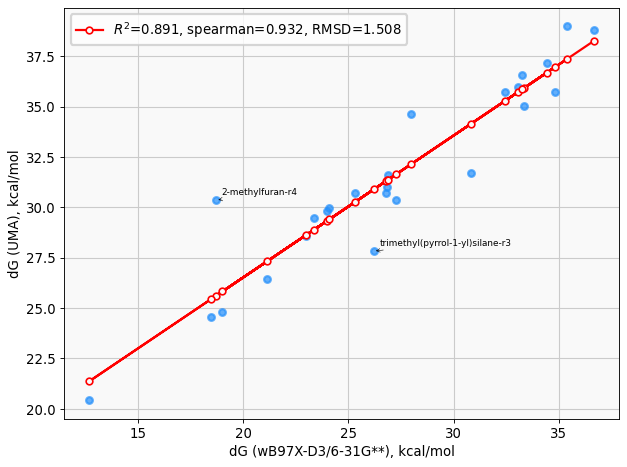

In [ ]:
vis.plot_regression_outliers(df_merged, "dG_ts1", "dG", xlabel="dG (wB97X-D3/6-31G**), kcal/mol", ylabel="dG (UMA), kcal/mol")